In [1]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [2]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

In [3]:
df2.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
import seaborn as sns
from matplotlib import pyplot as plt



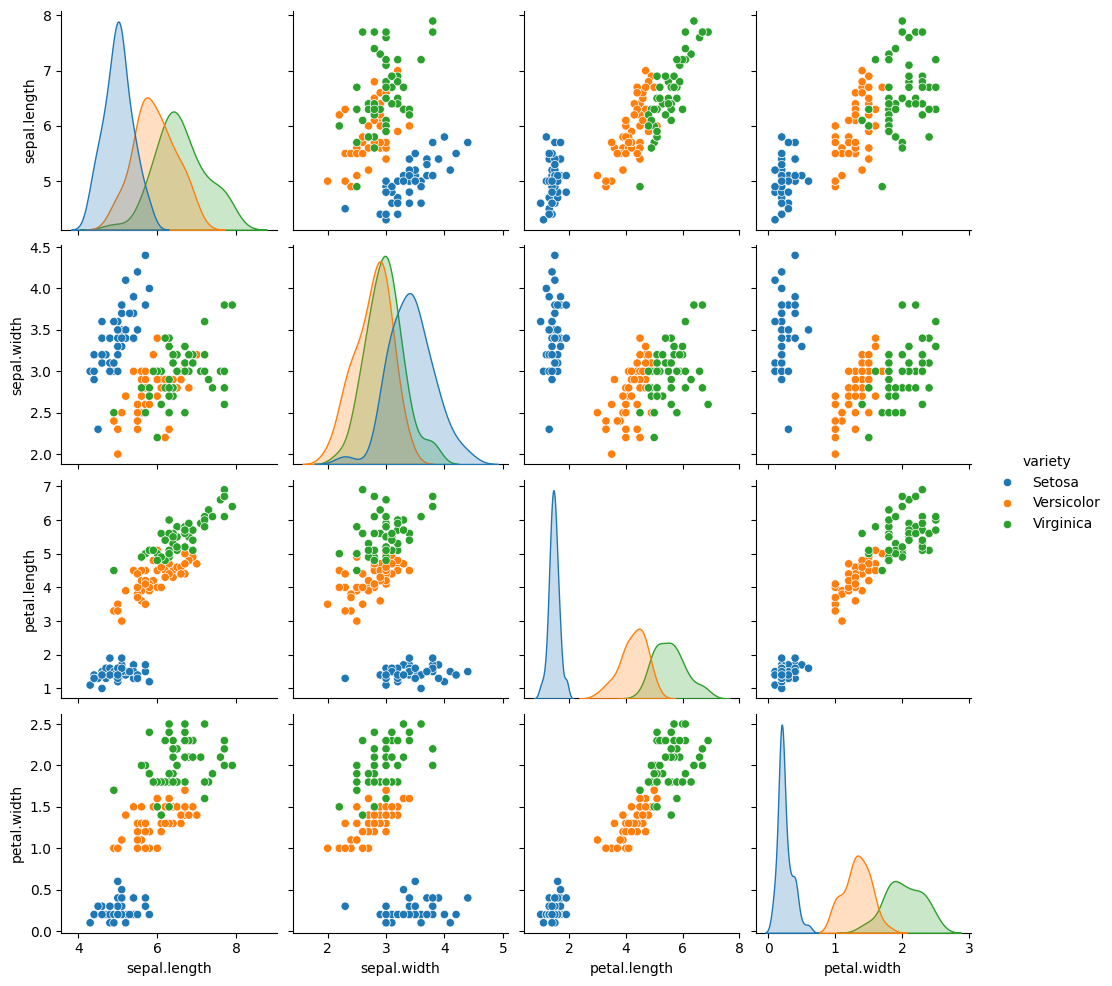

In [5]:
sns.pairplot(df2, hue = "variety")

In [6]:
dataset = df2.drop(['variety'], axis =1)
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


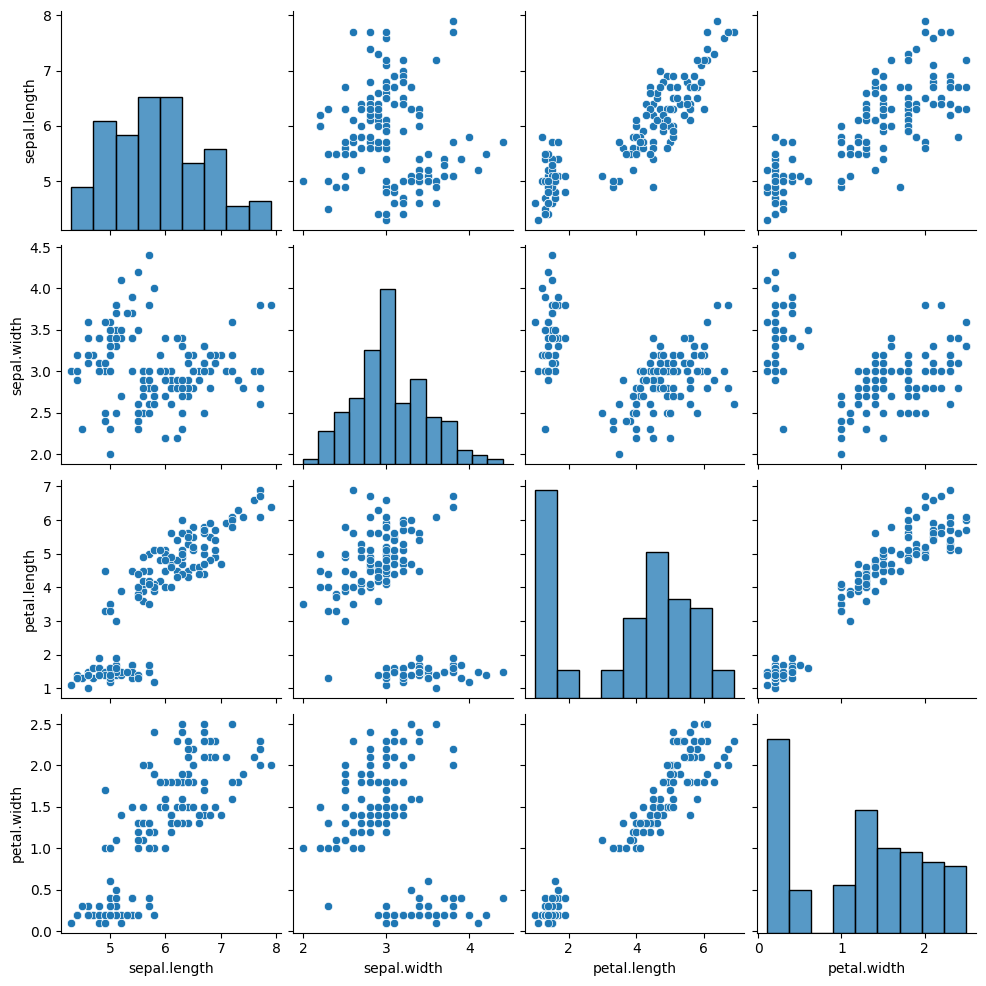

In [7]:
sns.pairplot(dataset)

<Axes: >

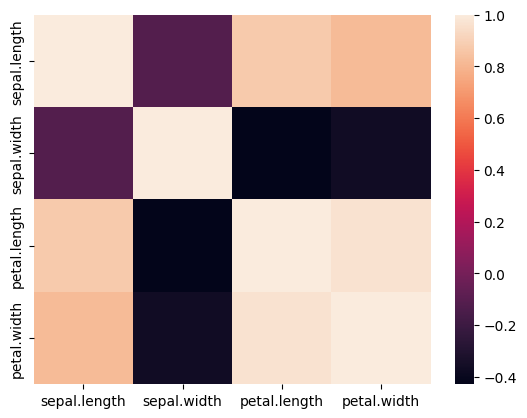

In [9]:
correl = dataset.corr()
sns.heatmap(correl)

In [15]:
normalized_df = (dataset- dataset.min())/(dataset.max()- dataset.min())
normalized_df.head()

,sepal.length,sepal.width,petal.length,petal.width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [16]:
normalized_df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [17]:
# kmeans clustering
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=3, max_iter =3)
kmeans_cluster = kmeans.fit_predict(normalized_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
kmeans_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

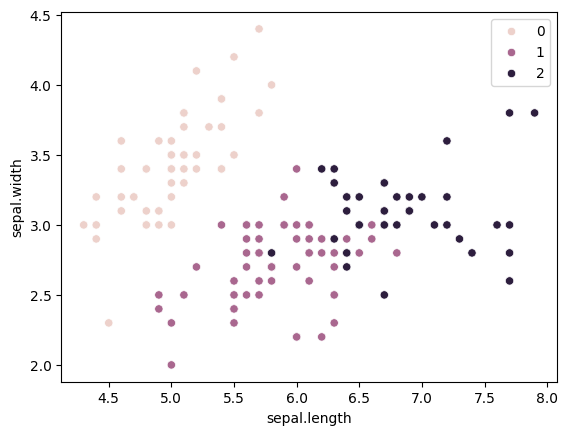

In [21]:
sns.scatterplot(data = dataset, x = 'sepal.length', y = 'sepal.width', hue=kmeans.labels_ )

In [25]:
kmeans2 = KMeans(n_clusters=3, max_iter =300)
kmeans_cluster2 = kmeans.fit_predict(normalized_df)
sns.scatterplot(data = dataset, x = 'sepal.length', y = 'sepal.width', hue=kmeans2.labels_ )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'KMeans' object has no attribute 'labels_'